In [18]:
import pandas as pd
from datetime import date
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sample_data/Movie-Dataset-Latest.csv')
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
# 1 Типы признаков и шкалы измерения
print('Типы шкал измерения для каждого признака:')

print('id          : абсолютная')
print('title       : номинальная')
print('release_date: интервальная')
print('overview    : номинальная')
print('popularity  : абсолютная')
print('vote_average: интервальная')
print('vote_count  : абсолютная')
print('video       : номинальная')
print()

print('Анализ двух признаков с разными шкалами:')
print()

print('vote_average:')
print(f'Среднее: ', df['vote_average'].mean())
print(f'Медиана: ', df['vote_average'].median())
print(f'Мода: ', df['vote_average'].mode().values[0])
print()

print('title:')
print('Среднее: Нет')
print('Медиана: Тоже нет')
print(f'Мода (самое частое название):', df['title'].mode().values[0])
print()

print('Вывод: Для номинальных признаков (на примере title) считать можно только моду. Среднее и медиану считать методологически неверно')

Типы шкал измерения для каждого признака:
id          : абсолютная
title       : номинальная
release_date: интервальная
overview    : номинальная
popularity  : абсолютная
vote_average: интервальная
vote_count  : абсолютная
video       : номинальная

Анализ двух признаков с разными шкалами:

vote_average:
Среднее:  6.596829758004861
Медиана:  6.6
Мода:  6.4

title:
Среднее: Нет
Медиана: Тоже нет
Мода (самое частое название): Beauty and the Beast

Вывод: Для номинальных признаков (на примере title) считать можно только моду. Среднее и медиану считать методологически неверно


In [29]:
# 2. Пропуски и их природа (MCAR / MAR / MNAR)
print('Выберем признак с пропусками - overview')
print('Количество пропусков:', df['overview'].isnull().sum())
print('Процент пропусков:', ((df['overview'].isnull().sum()) / df.shape[0] * 100).round(2))
print()

print('ГИПОТЕЗА 1: Пропуски - MCAR (Случайно)')
print('ГИПОТЕЗА 2: Пропуски - MAR (Дело в других признаках)')
print('ГИПОТЕЗА 3: Пропуски - MNAR (Дело в самом признаке)')
print()

print('Поскольку у самого признака всего 0,15% пропусков, то можно сделать вывод, что это не MNAR. Если предположить, что это пропуски MAR, то наиболее вероятно, что их наличие связано с:')
print('1. Тем, что фильмы очень старые')
print('2. Тем, что фильмы очень не популярны или малоизвестны')

missing_overview = df['overview'].isnull()

print('Средняя популярность (с пропусками):', df[missing_overview]['popularity'].mean().round(2))
print('Средняя популярность (без пропусков):', df[~missing_overview]['popularity'].mean().round(2))
print('Среднее количество оценок (с пропусками):', df[missing_overview]['vote_count'].mean().round(2))
print('Среднее количество оценок (без пропусков):', df[~missing_overview]['vote_count'].mean().round(2))

# Оно не считает даты по кол-ву дней, поэтому будет в годах
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

print('Средний год выпуска фильмов с пропусками:', df[missing_overview]['release_year'].mean().round(0))
print('Средний год выпуска фильмов без пропусков:', df[~missing_overview]['release_year'].mean().round(0))
print()

print('АБОБА')
print('Незначительная разница по Разница в несколько раз как по популярности, так и поколичеству оценок (даже не смотря на некоторые выбросы)')
print('Фильмы без описания:')
print(df[missing_overview][['title', 'release_date', 'popularity']].head(14).to_string())
print()

Выберем признак с пропусками - overview
Количество пропусков: 14
Процент пропусков: 0.15

ГИПОТЕЗА 1: Пропуски - MCAR (Случайно)
ГИПОТЕЗА 2: Пропуски - MAR (Дело в других признаках)
ГИПОТЕЗА 3: Пропуски - MNAR (Дело в самом признаке)

Поскольку у самого признака всего 0,15% пропусков, то можно сделать вывод, что это не MNAR. Если предположить, что это пропуски MAR, то наиболее вероятно, что их наличие связано с:
1. Тем, что фильмы очень старые
2. Тем, что фильмы очень не популярны или малоизвестны
Средняя популярность (с пропусками): 6.53
Средняя популярность (без пропусков): 35.72
Среднее количество оценок (с пропусками): 285.0
Среднее количество оценок (без пропусков): 1516.84
Средний год выпуска фильмов с пропусками: 2007.0
Средний год выпуска фильмов без пропусков: 2003.0

АБОБА
Незначительная разница по Разница в несколько раз как по популярности, так и поколичеству оценок (даже не смотря на некоторые выбросы)
Фильмы без описания:
                                 title release_dat

# 3. Индикатор пропуска как источник информации

Пропуск несёт информацию, когда он не случайность и связан с другими характеристиками объекта (т.е. его природа - MAR)

Если индикатор пропуска значим, значит пропуски не случайные и несут информацию. Простая замена пропусков уничтожит эту важную информацию

Для overview пропуски оказались полезны, поскольку они имеют закономерности с непопулярными фильмами.

Бесполезными был бы индикатор для признака, если бы он не имел никаких закономерностей в плане пропусков (например, если бы создатель датасета на вскидку удалил n-ое количество признака video)

Опасным бы считались индикаторы на признаки, которые завязаны на самих себе (Например если бы были бы фильмы, которые настолько старые, что точную дату в колонке дат их выпуска установить не удалось и пришлось пропустить)


In [30]:
# 4. Выброс - это ошибка или сигнал?
print('Для примера возьмем признак \'popularity\' и выброс с наибольшим значением')
print()

max_elements = df.nlargest(2, 'popularity')

print('Элемент с максимальной и предмаксимальной популярностью:\n', max_elements['title'])
print('Значение популярности:\n', max_elements['popularity'])
print('Разница почти в 2 раза')
print()

print("Потенциальные причины выброса:")
print("Фильм действительно очень популярен")
print("Возможна ошибка при сборе данных")
print("Данные могли быть собраны на пике популярности фильма")
print("Учитываются не только просмотры, но и активность в соцсетях")
print()

print("2. Что хуже для анализа?")
print()
print("Удалить выброс:")
print("Данные становятся более 'нормальными', но теряется информация о супер-популярных фильмах")
print()
print("Оставить без изменений:")
print("Сохраняется реальная картина, а среднее значение сильно искажается")
print()
print("Применить преобразование (логарифмирование):")
print("Сохраняется информация и при этом сглаживается влияние выброса. Интерпретация становится сложнее (Что такое логарифм популярности?)")

Для примера возьмем признак 'popularity' и выброс с наибольшим значением

Элемент с максимальной и предмаксимальной популярностью:
 23     Spider-Man: No Way Home
691                    Encanto
Name: title, dtype: object
Значение популярности:
 23     14136.690
691     8663.277
Name: popularity, dtype: float64
Разница почти в 2 раза

Потенциальные причины выброса:
Фильм действительно очень популярен
Возможна ошибка при сборе данных
Данные могли быть собраны на пике популярности фильма
Учитываются не только просмотры, но и активность в соцсетях

2. Что хуже для анализа?

Удалить выброс:
Данные становятся более 'нормальными', но теряется информация о супер-популярных фильмах

Оставить без изменений:
Сохраняется реальная картина, а среднее значение сильно искажается

Применить преобразование (логарифмирование):
Сохраняется информация и при этом сглаживается влияние выброса. Интерпретация становится сложнее (Что такое логарифм популярности?)


Анализируем признак с асимметрией: 'vote_count'
Коэффициент асимметрии:  4.123305396096337
1. Когда что предпочтительнее: 
Логарифмирование предпочтительно, когда данные имеют экспоненциальный рост или когда есть очень большие выбросы
При умеренной асимметрии и когда данные - это количество некоторых данных используется корень
Винзоризация подходит если выбросы - это ошибки, а не действительные значения и нужно сохранить исходный масштаб



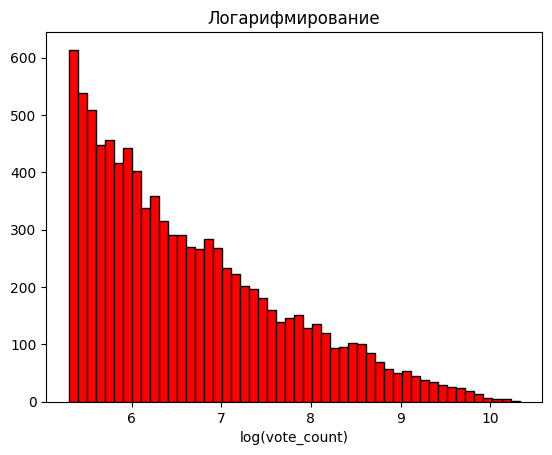

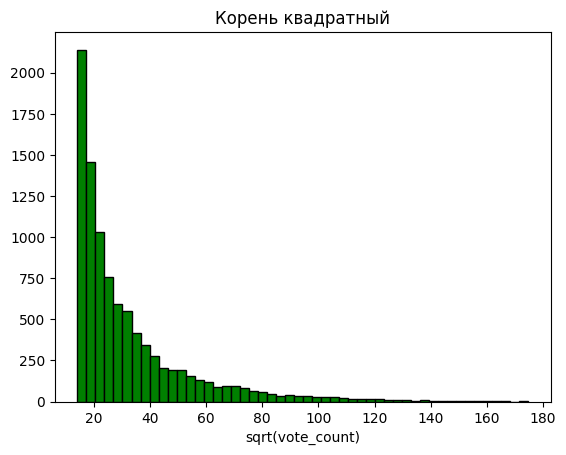

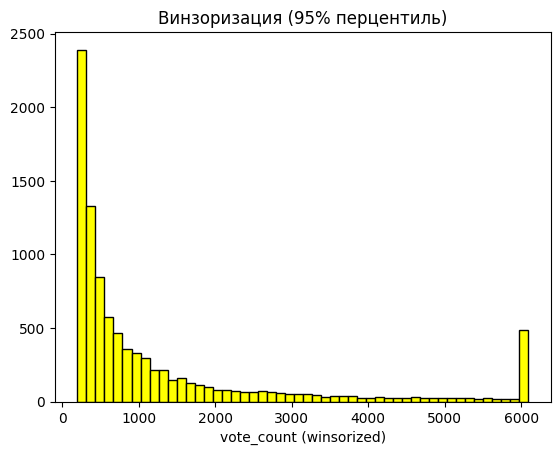


2. Влияние на различные аспекты:

Интерпретируемость:
Логарифм: Непонятная единица измерения
Корень: Единица измерения - квадрат
Винзоризация: Хорошо

Линейные модели:
Логарифм: Хорошо
Корень: Хорошо
Винзоризация: Асимметрия остается той же

Визуализация:
Логарифм: Хорошо
Корень: Хорошо
Винзоризация: Асимметрия остается той же


In [31]:
# 5. Преобразование или винзоризация?

print("Анализируем признак с асимметрией: 'vote_count'")
print(f"Коэффициент асимметрии: ", df['vote_count'].skew())

df['vote_count_log'] = np.log(df['vote_count'])
df['vote_count_sqrt'] = np.sqrt(df['vote_count'])
p95 = df['vote_count'].quantile(0.95)
df['vote_count_winsor'] = df['vote_count'].clip(upper=p95)

print('1. Когда что предпочтительнее: ')
print('Логарифмирование предпочтительно, когда данные имеют экспоненциальный рост или когда есть очень большие выбросы')
print('При умеренной асимметрии и когда данные - это количество некоторых данных используется корень')
print('Винзоризация подходит если выбросы - это ошибки, а не действительные значения и нужно сохранить исходный масштаб')
print()

plt.hist(df['vote_count_log'], bins=50, edgecolor='black', color='red')
plt.title('Логарифмирование')
plt.xlabel('log(vote_count)')
plt.show()
print()

plt.hist(df['vote_count_sqrt'], bins=50, edgecolor='black', color='green')
plt.title('Корень квадратный')
plt.xlabel('sqrt(vote_count)')
plt.show()
print()

plt.hist(df['vote_count_winsor'], bins=50, edgecolor='black', color='yellow')
plt.title('Винзоризация (95% перцентиль)')
plt.xlabel('vote_count (winsorized)')
plt.show()
print()

print("2. Влияние на различные аспекты:")
print()
print("Интерпретируемость:")
print("Логарифм: Непонятная единица измерения")
print("Корень: Единица измерения - квадрат")
print("Винзоризация: Хорошо")
print()
print("Линейные модели:")
print("Логарифм: Хорошо")
print("Корень: Хорошо")
print("Винзоризация: Асимметрия остается той же")
print()
print("Визуализация:")
print("Логарифм: Хорошо")
print("Корень: Хорошо")
print("Винзоризация: Асимметрия остается той же")

In [32]:
# 6. Средние, которые вводят в заблуждение

print("Анализируем признак: 'popularity'")
print()

print(f'Среднее арифметическое: ', df['popularity'].mean())
print(f'Медиана: ', df['popularity'].median())
print(f'Среднее геометрическое: ', np.exp(np.log1p(df['popularity']).mean()) - 1)
print()

print('Среднее арифметическое сильно завышено из-за выброса (Фильм "Spider-Man. No way to home").')
print('Медиана устойчива к выбросам и показывает "типичное" значение.')
print('Геометрическое среднее занимает промежуточное положение.')
print()

print('В связи с вышеуказаными фактами, медиана лучше всего отражает типичное значение, так как она устойчива к выбросам и не искажается экстремальными значениями.')

Анализируем признак: 'popularity'

Среднее арифметическое:  35.67818102081792
Медиана:  12.636
Среднее геометрическое:  16.648313080206346

Среднее арифметическое сильно завышено из-за выброса (Фильм "Spider-Man. No way to home").
Медиана устойчива к выбросам и показывает "типичное" значение.
Геометрическое среднее занимает промежуточное положение.

В связи с вышеуказаными фактами, медиана лучше всего отражает типичное значение, так как она устойчива к выбросам и не искажается экстремальными значениями.


В файле представлена диаграмма "Сравнение количества оценок к их средней". Она была представлена Scattter`ом


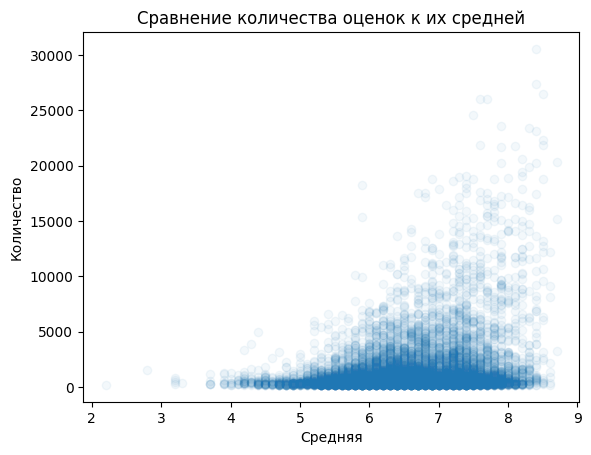

Технически, можно было реализовать её с помощью sns.kdeplot


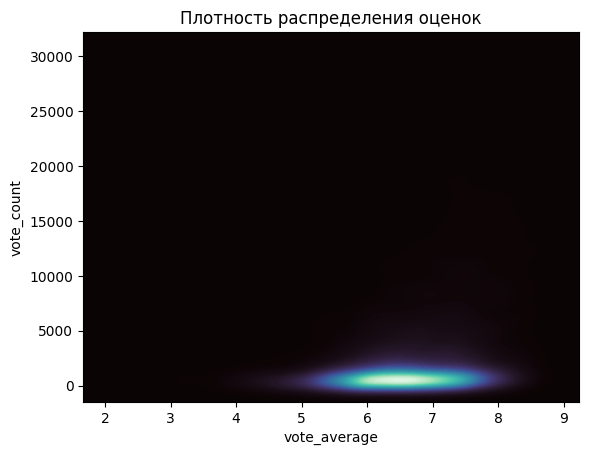

Но, как видно, это приведёт к тому, что палст значений от с большим количеством оценок будут упущены. Пользователь может прийти к выводу, что таких значений нет, что  окажется недействительным


In [14]:
# 7. Неправильная диаграмма

print('В файле представлена диаграмма "Сравнение количества оценок к их средней". Она была представлена Scattter`ом')

plt.scatter(df['vote_average'], df['vote_count'], alpha=0.05)
plt.title('Сравнение количества оценок к их средней')
plt.xlabel('Средняя')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

print('Технически, можно было реализовать её с помощью sns.kdeplot')

sns.kdeplot(data=df, x='vote_average', y='vote_count', fill=True, thresh=0, levels=100, cmap="mako")
plt.title('Плотность распределения оценок')
plt.show()

print('Но, как видно, это приведёт к тому, что палст значений от с большим количеством оценок будут упущены. Пользователь может прийти к выводу, что таких значений нет, что  окажется недействительным')

Первый график: Scatter



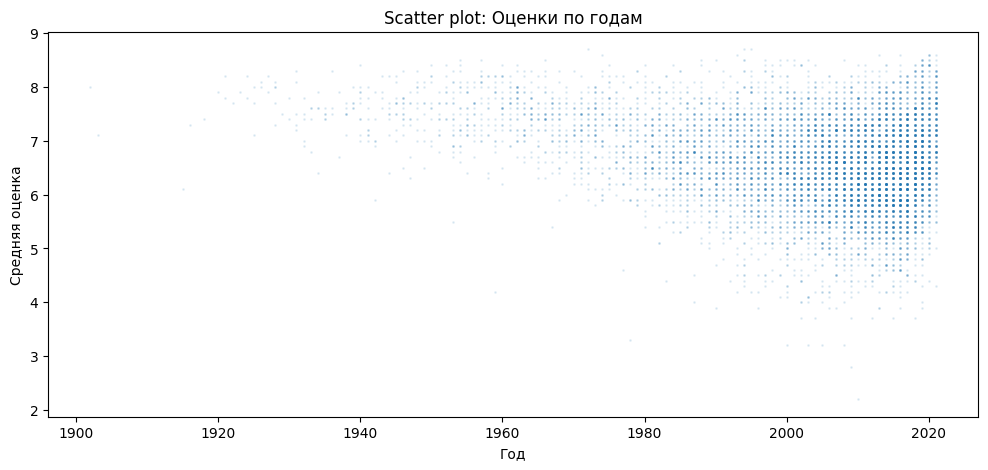


Преимущества графика Scatter:
- Каждый фильм как отдельная точка
- Видна плотность распределения
- Видны отдельные выбросы и аномалии

Какие гипотезы легко заметить:
Есть ли фильмы с высокими оценками в разные годы
Как меняется разброс оценок со временем

Второй график: BoxPlot



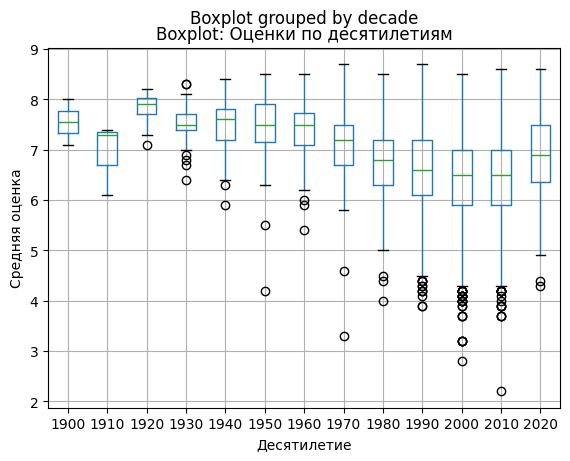


По BoxPlot`у видно:
- Показывает распределение оценок в каждом десятилетии
- Видны медиана, квартили и выбросы
- Легко сравнивать десятилетия между собой

Гипотезы:
Меняется ли качество фильмов со временем
В какие десятилетия оценки более стабильны
Есть ли десятилетия с аномально низкими/высокими оценками

Сравнение графиков:

Scatter plot лучше подходит для детального анализа, поиска нелинейных зависимостей и выявления кластеров

В свою очередь, BoxPlot лучше для сравнения распределений между группами, быстрого понимания общей картины и выявления изменений в центральной тенденции



In [47]:
# 8. Одна и та же информация - разные графики

print('Первый график: Scatter')
print()

plt.figure(figsize=(12, 5))
plt.scatter(df['release_year'], df['vote_average'], alpha=0.1, s=1)
plt.xlabel('Год')
plt.ylabel('Средняя оценка')
plt.title('Scatter plot: Оценки по годам')

plt.show()
print()

print("Преимущества графика Scatter:")
print("- Каждый фильм как отдельная точка")
print("- Видна плотность распределения")
print("- Видны отдельные выбросы и аномалии")
print()
print("Какие гипотезы легко заметить:")
print("Есть ли фильмы с высокими оценками в разные годы")
print("Как меняется разброс оценок со временем")

print()
print('Второй график: BoxPlot')
print()

# Ящик с усами по десятилетиям
df['decade'] = (df['release_year'] // 10) * 10
df.boxplot(column='vote_average', by='decade')
plt.xlabel('Десятилетие')
plt.ylabel('Средняя оценка')
plt.title('Boxplot: Оценки по десятилетиям')

plt.show()
print()

print("По BoxPlot`у видно:")
print("- Показывает распределение оценок в каждом десятилетии")
print("- Видны медиана, квартили и выбросы")
print("- Легко сравнивать десятилетия между собой")
print()
print("Гипотезы:")
print("Меняется ли качество фильмов со временем")
print("В какие десятилетия оценки более стабильны")
print("Есть ли десятилетия с аномально низкими/высокими оценками")

print()
print("Сравнение графиков:")
print()
print("Scatter plot лучше подходит для детального анализа, поиска нелинейных зависимостей и выявления кластеров")
print()
print("В свою очередь, BoxPlot лучше для сравнения распределений между группами, быстрого понимания общей картины и выявления изменений в центральной тенденции")
print()